## All packages and libraries

In [1]:
# For installing any libraries
'''
!pip install <library>
'''

'\n!pip install <library>\n'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
from math import e

# NLP
import re
import nltk
from nltk.corpus import stopwords

# Machine Learing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from pandas.plotting import scatter_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
warnings.filterwarnings('ignore')

## Data Cleaning - Yu Zhang, Zhirui Chen

In [3]:
#import data
df = pd.read_csv('listings_new.csv', engine ='python', encoding = "gbk") 
df

,id,name,description,neighborhood_overview,host_id,price,host_name,host_about,host_is_superhost,host_has_profile_pic,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,2595,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,2845,$175.00,Jennifer,A New Yorker since 2000! My passion is creatin...,f,t,...,48,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,0.37
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,4869,$76.00,LisaRoxanne,Laid-back Native New Yorker (formerly bi-coast...,f,t,...,349,89.0,8.0,9.0,9.0,9.0,9.0,9.0,f,4.82
2,5121,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,7356,$60.00,Garon,"I am an artist(painter, filmmaker) and curato...",f,t,...,50,90.0,8.0,8.0,10.0,10.0,9.0,9.0,f,0.36
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,7378,$175.00,Rebecca,"Rebecca is an artist/designer, and Henoch is i...",f,t,...,1,97.0,10.0,10.0,10.0,10.0,8.0,10.0,f,0.01
4,5178,Large Furnished Room Near B'way_,Please don__ expect the luxury here just a bas...,"Theater district, many restaurants around here.",8967,$79.00,Shunichi,I used to work for a financial industry but no...,f,t,...,473,84.0,9.0,7.0,9.0,9.0,10.0,9.0,f,3.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45751,45327718,Spacious 1 Queen Bedroom in Central Park,"Private room with queen bed in a 4 bedroom, 1....",NaN,305240193,$53.00,June,NaN,f,t,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
45752,45329132,"5,000 sq ft Downtown Brooklyn Penthouse",NaN,NaN,79946214,$79.00,Gopal,Hiya!\r\n\r\nBeen immersing myself in New York...,f,t,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
45753,45329491,Spacious 1 Queen Bedroom in Tribeca,"Private room with queen bed in a 6 bedroom, 2 ...",NaN,305240193,$70.00,June,NaN,f,t,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
45754,45329984,Spacious 1 Full Bedroom in Murray Hill,"Private room with full bed in a 2 bedroom, 1 b...",NaN,305240193,$59.00,June,NaN,f,t,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN


In [4]:
df.shape

(45756, 32)

In [5]:
#remove empty and na rows
df1 = df.dropna(axis = 0, how = 'any')

df1.shape

(15022, 32)

In [6]:
#change t/f to 1/0
df1.loc[df['host_is_superhost'] == 'f', 'host_is_superhost'] = 0
df1.loc[df['host_is_superhost'] == 't', 'host_is_superhost'] = 1

df1.loc[df['host_has_profile_pic'] == 'f', 'host_has_profile_pic'] = 0
df1.loc[df['host_has_profile_pic'] == 't', 'host_has_profile_pic'] = 1

df1.loc[df['host_identity_verified'] == 'f', 'host_identity_verified'] = 0
df1.loc[df['host_identity_verified'] == 't', 'host_identity_verified'] = 1

df1.loc[df['instant_bookable'] == 'f', 'instant_bookable'] = 0
df1.loc[df['instant_bookable'] == 't', 'instant_bookable'] = 1

In [7]:
print(df1['bathrooms_text'].value_counts())

1 bath               7037
1 shared bath        4726
1 private bath        811
2 baths               808
1.5 baths             470
1.5 shared baths      396
2 shared baths        369
2.5 baths             128
3 baths                88
3 shared baths         44
3.5 baths              29
0 shared baths         18
0 baths                16
4 shared baths         14
2.5 shared baths       13
Half-bath              11
4 baths                11
4.5 baths               6
Private half-bath       5
5 baths                 5
Shared half-bath        5
5.5 baths               3
3.5 shared baths        2
6 baths                 2
4.5 shared baths        2
5 shared baths          1
6.5 shared baths        1
7 baths                 1
Name: bathrooms_text, dtype: int64


In [8]:
df2 = df1[(df1['bathrooms_text'] != 'Half-bath') & (df1['bathrooms_text'] != 'Private half-bath') & 
          (df1['bathrooms_text'] != 'Shared half-bath')]
df2.shape

(15001, 32)

In [9]:
#only get the number
df2['bathroom_num'] = df2["bathrooms_text"].str.extract(r"(\d+\.\d+|\d+)")

In [10]:
#share bathroom or not
df2.loc[df2['bathrooms_text'].str.contains('share'), 'bathrooms_text'] = 1
df2.loc[df2['bathrooms_text'] != 1, 'bathrooms_text'] = 0

df2.rename(columns = {'bathrooms_text': 'bathroom_share_or_not', 'bathroom_num': 'bathrooms'}, inplace = True)

In [11]:
#change price into integer
df3 = df2.copy()

df3['price'] = df3['price'].map(lambda x: x.lstrip('$').rstrip('.00'))
df3['price'] = df3['price'].replace(',', '', regex=True)
df3['price'] = df3['price'].astype('float64')
df3['price'] = df3['price'].round()
df3['price'] = df3['price'].astype(int)

In [12]:
#remove outlier using IQR
pd.DataFrame(df3['price']).describe(percentiles = [.25, .75])

,price
count,15001.000000
mean,134.494367
std,201.270291
min,10.000000
25%,64.000000
50%,99.000000
75%,155.000000
max,10000.000000


In [13]:
iqr = 155 - 64
lower_bound = 64 - (1.5 * iqr) 
upper_bound = 155 + (1.5 * iqr)
print("lower_bound:", lower_bound, "upper_bound:", upper_bound)

lower_bound: -72.5 upper_bound: 291.5


In [14]:
df3 = df3[(df3['price'] <= upper_bound)]
df3.shape

(14064, 33)

In [15]:
#add log_price
df3['log_price'] = np.log(df3['price'])

In [16]:
df3['Price'] = round(df3['log_price']).astype('int')
print(df3['Price'])

1        4
4        4
5        4
6        5
7        5
        ..
45210    5
45224    4
45397    4
45566    4
45605    4
Name: Price, Length: 14064, dtype: int32


In [17]:
data1 = df3.copy() # for visualization

In [18]:
df3['room_type']= df3['room_type'].astype("category").cat.codes
df3['bathrooms']= df3['bathrooms'].astype("category").cat.codes
df3['neighbourhood_group_cleansed']= df3['neighbourhood_group_cleansed'].astype("category").cat.codes
print(df3['neighbourhood_group_cleansed'])

1        1
4        2
5        2
6        2
7        2
        ..
45210    3
45224    3
45397    1
45566    1
45605    1
Name: neighbourhood_group_cleansed, Length: 14064, dtype: int8


In [19]:
df3

,id,name,description,neighborhood_overview,host_id,price,host_name,host_about,host_is_superhost,host_has_profile_pic,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,bathrooms,log_price,Price
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,4869,76,LisaRoxanne,Laid-back Native New Yorker (formerly bi-coast...,0,1,...,9.0,9.0,9.0,9.0,9.0,0,4.82,1,4.330733,4
4,5178,Large Furnished Room Near B'way_,Please don__ expect the luxury here just a bas...,"Theater district, many restaurants around here.",8967,79,Shunichi,I used to work for a financial industry but no...,0,1,...,7.0,9.0,9.0,10.0,9.0,0,3.42,1,4.369448,4
5,5203,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,7490,75,MaryEllen,Welcome to family life with my oldest two away...,0,1,...,10.0,10.0,10.0,10.0,10.0,0,0.88,1,4.317488,4
6,5238,Cute & Cozy Lower East Side 1 bdrm,"Live like a New Yorker instead of a stuffy, ti...","Historically, the Lower East Side was a stoppi...",7549,140,Ben,"I live in NYC, I work in Oklahoma, but origina...",1,1,...,9.0,10.0,10.0,9.0,9.0,0,1.20,1,4.941642,5
7,5552,Spacious river view in the West Village,"Beautiful, spacious, light-filled 1-bedroom ap...",The West Village is a great neighborhood - qui...,8380,160,Maria,"School psychologist, singer, kitchen designer,...",0,1,...,9.0,10.0,10.0,10.0,10.0,0,0.49,1,5.075174,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45210,45003588,Bay House Duplex,A ONE IF A KIND LISTING ..<br />Located in bea...,The house is a 15 minute walk from JFK AIRPORT...,183127881,175,Giana,HELLO GUEST\nCOVID-19 HAS AFFECTED US ALL IN D...,0,1,...,9.0,10.0,10.0,10.0,10.0,1,3.00,3,5.164786,5
45224,45031142,Renovated Private Room in NYC,It's a great apartment to stay in NYC. The apa...,Free parking on the street. No parking on prop...,361789090,47,Stefhanie,I'm glad to share my place with you all!,0,1,...,2.0,10.0,2.0,10.0,2.0,1,1.00,3,3.850148,4
45397,45125290,Welcome to Beacon House! A creative retreat in...,A true gem nestled between Prospect Park & Gre...,No other neighborhood in New York City boasts ...,15848920,55,Afika,-- Unbridled optimist.\r\n-- Adventurer.\r\n--...,0,1,...,10.0,10.0,10.0,10.0,10.0,0,2.00,3,4.007333,4
45566,45223333,_锔 Large and Sunny Private Room 25 min to Manh...,"Beautiful room, in the heart _わ_ of Bay ridge,...",Bay Ridge is in Kings County and is one of the...,41424652,54,Dimitri,"Hello everyone! My name is Dimitri, I like to ...",1,1,...,10.0,10.0,10.0,10.0,10.0,0,1.00,1,3.988984,4


In [20]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14064 entries, 1 to 45605
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            14064 non-null  int64  
 1   name                          14064 non-null  object 
 2   description                   14064 non-null  object 
 3   neighborhood_overview         14064 non-null  object 
 4   host_id                       14064 non-null  int64  
 5   price                         14064 non-null  int32  
 6   host_name                     14064 non-null  object 
 7   host_about                    14064 non-null  object 
 8   host_is_superhost             14064 non-null  object 
 9   host_has_profile_pic          14064 non-null  object 
 10  host_identity_verified        14064 non-null  object 
 11  neighbourhood_group_cleansed  14064 non-null  int8   
 12  latitude                      14064 non-null  float64
 13  l

## Data Visualization - Jie Chen, Jiarui Guo

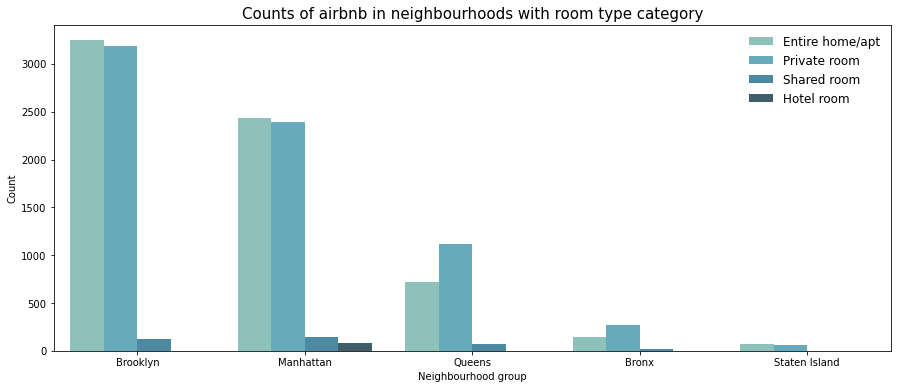

In [21]:
plt.figure(figsize=(15,6))
sns.countplot(data=data1, x='neighbourhood_group_cleansed', hue='room_type', palette='GnBu_d')
plt.title('Counts of airbnb in neighbourhoods with room type category', fontsize=15)
plt.xlabel('Neighbourhood group')
plt.ylabel("Count")
plt.legend(frameon=False, fontsize=12,loc = 'upper right')

(-200.0, 1000.0)

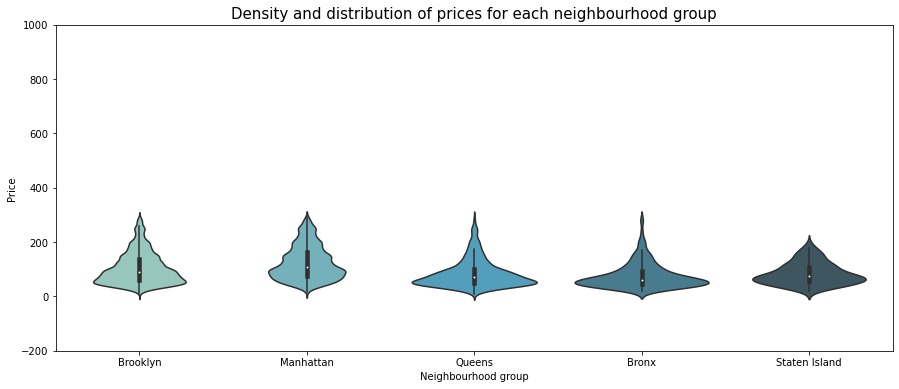

In [22]:
plt.figure(figsize=(15,6))
sns.violinplot(data=data1, x='neighbourhood_group_cleansed', y='price', palette='GnBu_d')
plt.title('Density and distribution of prices for each neighbourhood group', fontsize=15)
plt.xlabel('Neighbourhood group')
plt.ylabel("Price")
plt.ylim(-200,1000)

Text(0, 0.5, 'Count')

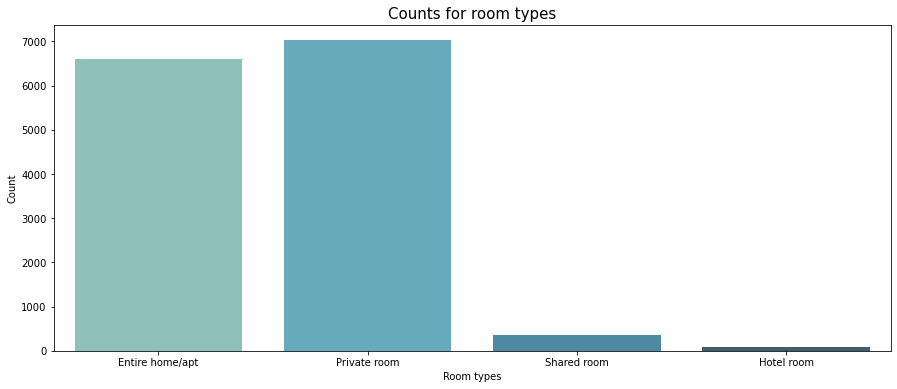

In [23]:
plt.figure(figsize=(15,6))
sns.countplot(data=data1, x='room_type', palette='GnBu_d')
plt.title('Counts for room types', fontsize=15)
plt.xlabel('Room types')
plt.ylabel("Count")

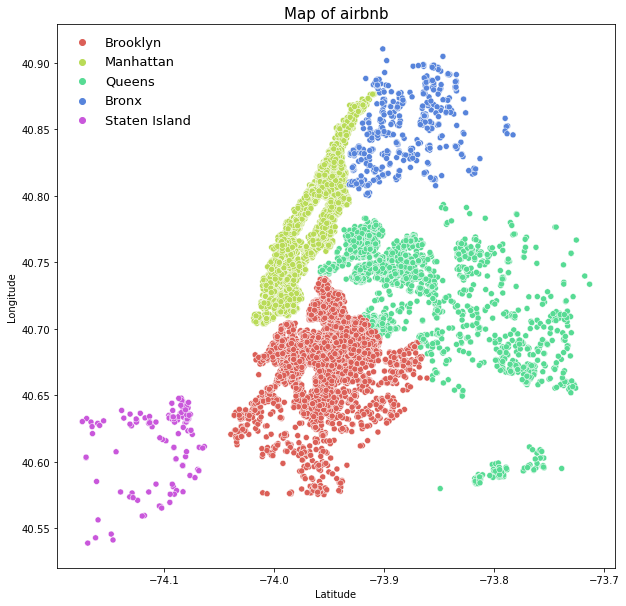

In [24]:
plt.figure(figsize=(10,10))
a = sns.scatterplot(data=data1, x='longitude', y='latitude', hue='neighbourhood_group_cleansed', palette='hls')
plt.title('Map of airbnb', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel("Longitude")
plt.legend(frameon=False, fontsize=13)

In [25]:
top_3_neigh = pd.DataFrame(data1['neighbourhood_group_cleansed'].value_counts().head(3))
top_3_neigh.columns=['Listings']
top_3_neigh['Neighbourhood Group'] = top_3_neigh.index
top_3_neigh.reset_index(drop=True, inplace=True)
top_3_neigh

,Listings,Neighbourhood Group
0,6558,Brooklyn
1,5055,Manhattan
2,1896,Queens


In [26]:
# Brooklyn
nei1 = data1.loc[data1['neighbourhood_group_cleansed'] == 'Brooklyn']
price_nei1 = nei1[['price']]
# Manhattan
nei2 = data1.loc[data1['neighbourhood_group_cleansed'] == 'Manhattan']
price_nei2 = nei2[['price']]
# Queens
nei3 = data1.loc[data1['neighbourhood_group_cleansed'] == 'Queens']
price_nei3 = nei3[['price']]
# Staten Island
nei4 = data1.loc[data1['neighbourhood_group_cleansed'] == 'Staten Island']
price_nei4 = nei4[['price']]
# Bronx
nei5 = data1.loc[data1['neighbourhood_group_cleansed'] == 'Bronx']
price_nei5 = nei5[['price']]

price_list = [price_nei1, price_nei2, price_nei3, price_nei4, price_nei5]



price_stats = []
nei_list = ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

# price statistics for every neighbourhood

for x in price_list:
    i = x.describe(percentiles=[.25, .5, .75])
    i = i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index': 'Stats'}, inplace=True)
    price_stats.append(i)

price_stats[0].rename(columns={'price': nei_list[0]}, inplace=True)
price_stats[1].rename(columns={'price': nei_list[1]}, inplace=True)
price_stats[2].rename(columns={'price': nei_list[2]}, inplace=True)
price_stats[3].rename(columns={'price': nei_list[3]}, inplace=True)
price_stats[4].rename(columns={'price': nei_list[4]}, inplace=True)

# final view of dataframe

stats_df = price_stats
stats_df = [df.set_index('Stats') for df in stats_df]
stats_df=stats_df[0].join(stats_df[1:])
stats_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,10.0,17.0,10.0,20.0,20.0
25%,59.0,75.0,50.0,58.0,45.0
50%,90.0,110.0,70.0,75.0,61.0
75%,139.0,165.0,101.0,110.0,95.0
max,290.0,291.0,290.0,195.0,285.0


Text(0, 0.5, 'Log Price')

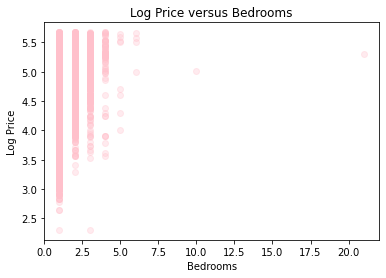

In [27]:
plt.scatter(data1['bedrooms'],data1['log_price'],alpha=0.3,color = 'pink')
plt.title('Log Price versus Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Log Price')

Text(0, 0.5, 'Log Price')

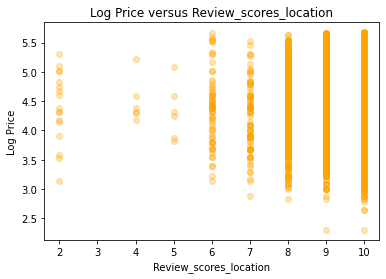

In [28]:
plt.scatter(data1['review_scores_location'],data1['log_price'],alpha=0.3,color = 'orange')
plt.title('Log Price versus Review_scores_location')
plt.xlabel('Review_scores_location')
plt.ylabel('Log Price')

Text(0, 0.5, 'Log Price')

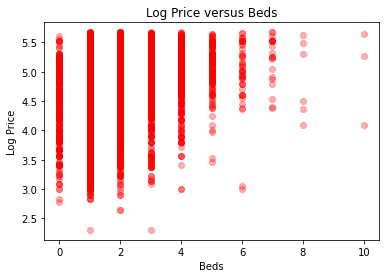

In [29]:
plt.scatter(data1['beds'],data1['log_price'],alpha=0.3,color = 'red')
plt.title('Log Price versus Beds')
plt.xlabel('Beds')
plt.ylabel('Log Price')

Text(0, 0.5, 'Log Price')

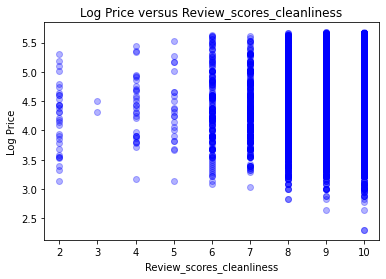

In [30]:
plt.scatter(data1['review_scores_cleanliness'],data1['log_price'],alpha=0.3,color = 'blue')
plt.title('Log Price versus Review_scores_cleanliness')
plt.xlabel('Review_scores_cleanliness')
plt.ylabel('Log Price')

Text(0, 0.5, 'Log Price')

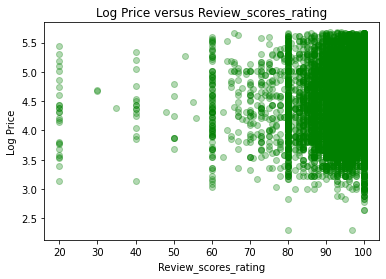

In [31]:
plt.scatter(data1['review_scores_rating'],data1['log_price'],alpha=0.3,color = 'green')
plt.title('Log Price versus Review_scores_rating')
plt.xlabel('Review_scores_rating')
plt.ylabel('Log Price')

Text(0, 0.5, 'Log Price')

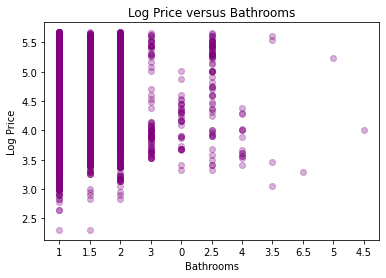

In [32]:
plt.scatter(data1['bathrooms'],data1['log_price'],alpha=0.3,color = 'purple')
plt.title('Log Price versus Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Log Price')

## NLP - Qinyi Li

In [33]:
data = df3.copy()

In [34]:
# 1. remove "</b> <br/> ..."replace it with space

In [35]:
def remove_punct(line):
    return re.sub('[<][^>]+[>]', ' ', line).lower()

In [36]:
data['clean_description'] = data['description'].apply(remove_punct)

In [37]:
data[['description', 'clean_description']]

,description,clean_description
1,"Enjoy 500 s.f. top floor in 1899 brownstone, w...","enjoy 500 s.f. top floor in 1899 brownstone, w..."
4,Please don__ expect the luxury here just a bas...,please don__ expect the luxury here just a bas...
5,"Our best guests are seeking a safe, clean, spa...","our best guests are seeking a safe, clean, spa..."
6,"Live like a New Yorker instead of a stuffy, ti...","live like a new yorker instead of a stuffy, ti..."
7,"Beautiful, spacious, light-filled 1-bedroom ap...","beautiful, spacious, light-filled 1-bedroom ap..."
...,...,...
45210,A ONE IF A KIND LISTING ..<br />Located in bea...,a one if a kind listing .. located in beautifu...
45224,It's a great apartment to stay in NYC. The apa...,it's a great apartment to stay in nyc. the apa...
45397,A true gem nestled between Prospect Park & Gre...,a true gem nestled between prospect park & gre...
45566,"Beautiful room, in the heart _わ_ of Bay ridge,...","beautiful room, in the heart _わ_ of bay ridge,..."


In [38]:
# 2. Remove punctuation, digits and special characters, then get rid of stopwords

In [39]:
def tokenize_no_stopwords(line):
    tokens = nltk.tokenize.word_tokenize(line)
    tokens_no_stop = [w for w in tokens if w.isalpha() and w not in stopwords.words('english')]
    return " ".join(tokens_no_stop)

In [40]:
data['final_description'] = data['clean_description'].apply(tokenize_no_stopwords)

In [41]:
data[['final_description', 'clean_description']]

,final_description,clean_description
1,enjoy top floor brownstone wood ceramic floori...,"enjoy 500 s.f. top floor in 1899 brownstone, w..."
4,please expect luxury basic room center manhatt...,please don__ expect the luxury here just a bas...
5,best guests seeking safe clean spare room fami...,"our best guests are seeking a safe, clean, spa..."
6,live like new yorker instead stuffy tiny overp...,"live like a new yorker instead of a stuffy, ti..."
7,beautiful spacious apartment historic neighbor...,"beautiful, spacious, light-filled 1-bedroom ap..."
...,...,...
45210,one kind listing located beautiful quiet howar...,a one if a kind listing .. located in beautifu...
45224,great apartment stay nyc apartment shared room...,it's a great apartment to stay in nyc. the apa...
45397,true gem nestled prospect park greenwood cemet...,a true gem nestled between prospect park & gre...
45566,beautiful room heart bay ridge close shopping ...,"beautiful room, in the heart _わ_ of bay ridge,..."


In [42]:
# 3. Make amenities strings to lists

In [43]:
data['amenities']

1        ["Iron", "Extra pillows and blankets", "Smoke ...
4        ["Refrigerator", "Iron", "Extra pillows and bl...
5        ["Laptop-friendly workspace", "Carbon monoxide...
6        ["Iron", "Smoke alarm", "Stove", "Coffee maker...
7        ["Iron", "Waterfront", "Smoke alarm", "Stove",...
                               ...                        
45210    ["Iron", "Smoke alarm", "Breakfast", "Hot wate...
45224    ["Iron", "Carbon monoxide alarm", "Heating", "...
45397    ["Laptop-friendly workspace", "Iron", "Dryer",...
45566    ["Cleaning before checkout", "Smoke alarm", "S...
45605    ["Laptop-friendly workspace", "Iron", "Dryer",...
Name: amenities, Length: 14064, dtype: object

In [44]:
def amenities_lists(line):
    line = re.sub('", "', ',', line).lower()
    line = re.sub('"', '', line)
    line = line[1:-2]
    list1 = re.split(r',',line)
   # a = list1[1:(len(list1)-1)]
    return list1

In [45]:
data['amenities_list'] = data['amenities'].apply(amenities_lists)

In [46]:
data['amenities_list']

1        [iron, extra pillows and blankets, smoke alarm...
4        [refrigerator, iron, extra pillows and blanket...
5        [laptop-friendly workspace, carbon monoxide al...
6        [iron, smoke alarm, stove, coffee maker, cooki...
7        [iron, waterfront, smoke alarm, stove, coffee ...
                               ...                        
45210    [iron, smoke alarm, breakfast, hot water, lapt...
45224    [iron, carbon monoxide alarm, heating, smoke a...
45397    [laptop-friendly workspace, iron, dryer, heati...
45566    [cleaning before checkout, smoke alarm, stove,...
45605    [laptop-friendly workspace, iron, dryer, heati...
Name: amenities_list, Length: 14064, dtype: object

In [47]:
# remove some dupilicate and wrong values, such as 'breakfas'

In [48]:
for i in data['amenities_list']:
    if 'breakfas' in i:
        i.remove('breakfas')
        i.append('breakfast')
        
for i in data['amenities_list']:
    if 'bed linens' in i:
        i.remove('bed linens')
        i.append('bed linen')

for i in data['amenities_list']:
    if 'building staf' in i:
        i.remove('building staf')
        i.append('building staff')

for i in data['amenities_list']:
    if 'cable t' in i:
        i.remove('cable t')
        i.append('cable tv')
        
for i in data['amenities_list']:
    if 'breakfas' in i:
        i.remove('breakfas')
        i.append('breakfast')

for i in data['amenities_list']:
    if 'coffee make' in i:
        i.remove('coffee make')
        i.append('coffee maker')
        
for i in data['amenities_list']:
    if 'dishes and silverwar' in i:
        i.remove('dishes and silverwar')
        i.append('dishes and silverware')

        
for i in data['amenities_list']:
    if 'elevato' in i:
        i.remove('elevato')
        i.append('elevator')

for i in data['amenities_list']:
    if 'essential' in i:
        i.remove('essential')
        i.append('essentials')

for i in data['amenities_list']:
    if 'fire extinguishe' in i:
        i.remove('fire extinguishe')
        i.append('fire extinguisher')
  

for i in data['amenities_list']:
    if 'first aid ki' in i:
        i.remove('first aid ki')
        i.append('first aid kit')

        
for i in data['amenities_list']:
    if 'free street parkin' in i:
        i.remove('free street parkin')
        i.append('free street parking')

for i in data['amenities_list']:
    if 'heatin' in i:
        i.remove('heatin')
        i.append('heating')

for i in data['amenities_list']:
    if 'host greets yo' in i:
        i.remove('host greets yo')
        i.append('host greets you')
                
for i in data['amenities_list']:
    if 'hot wate' in i:
        i.remove('hot wate')
        i.append('hot water')
  

for i in data['amenities_list']:
    if 'keypa' in i:
        i.remove('keypa')
        i.append('keypad')

        
for i in data['amenities_list']:
    if 'kitche' in i:
        i.remove('kitche')
        i.append('kitchen')

for i in data['amenities_list']:
    if 'ove' in i:
        i.remove('ove')
        i.append('oven')

for i in data['amenities_list']:
    if 'private entranc' in i:
        i.remove('private entranc')
        i.append('private entrance')       
        
for i in data['amenities_list']:
    if 'private living roo' in i:
        i.remove('private living roo')
        i.append('private living room')
  

for i in data['amenities_list']:
    if 'room-darkening shades' in i:
        i.remove('room-darkening shades')
        i.append('room-darkening shade')

        
for i in data['amenities_list']:
    if 'shampo' in i:
        i.remove('shampo')
        i.append('shampoo')

for i in data['amenities_list']:
    if 'ove' in i:
        i.remove('ove')
        i.append('oven')

for i in data['amenities_list']:
    if 'private entranc' in i:
        i.remove('private entranc')
        i.append('private entrance')
               
for i in data['amenities_list']:
    if 'smoke alar' in i:
        i.remove('smoke alar')
        i.append('smoke alarm')

        
for i in data['amenities_list']:
    if 't' in i:
        i.remove('t')
        i.append('tv')

for i in data['amenities_list']:
    if 'washe' in i:
        i.remove('washe')
        i.append('washer')

for i in data['amenities_list']:
    if 'wif' in i:
        i.remove('wif')
        i.append('wifi')

In [49]:
amenities = []
for i in data['amenities_list']:
    amenities.extend(i)

In [50]:
len(set(amenities))

85

In [51]:
# 4. N-gram Analysis

In [52]:
string = ' '.join(data['final_description'])
str_val = string.split(" ")

Text(0.5, 0.98, 'Top 30 frequent words for NYC Airbnb descriptions')

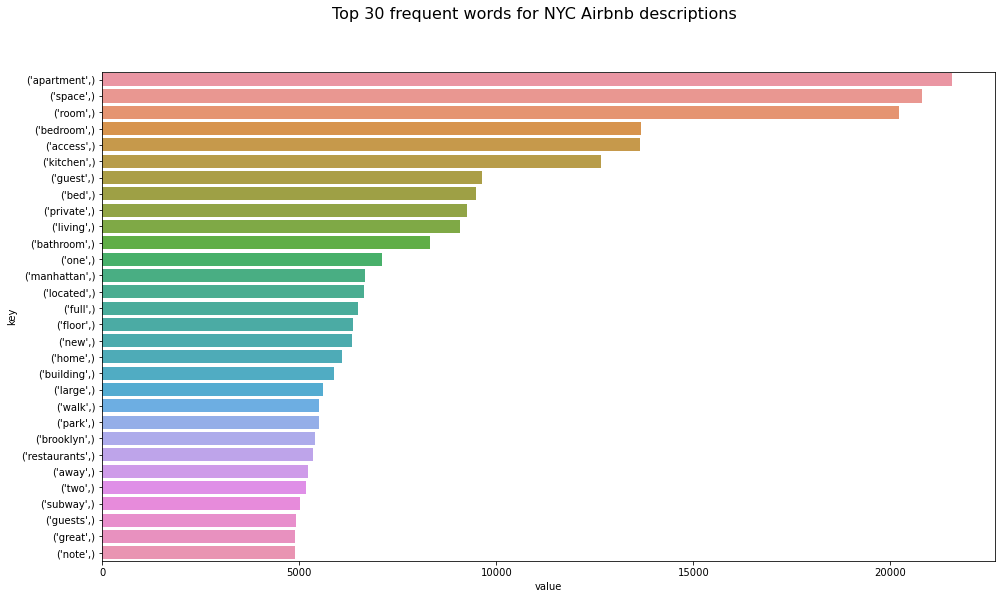

In [53]:
# Descriptions
# Unigram analysis

data_unigram=(pd.Series(nltk.ngrams(str_val, 1)).value_counts())[:30]
data_unigram_df=pd.DataFrame(data_unigram)
data_unigram_df = data_unigram_df.reset_index()
data_unigram_df = data_unigram_df.rename(columns={"index": "key", 0: "value"})
plt.figure(figsize = (16,9))
sns.barplot(x='value',y='key', data=data_unigram_df)
plt.suptitle('Top 30 frequent words for NYC Airbnb descriptions',size=16)

Text(0.5, 0.98, 'Top 30 frequent bigrams for NYC Airbnb descriptions')

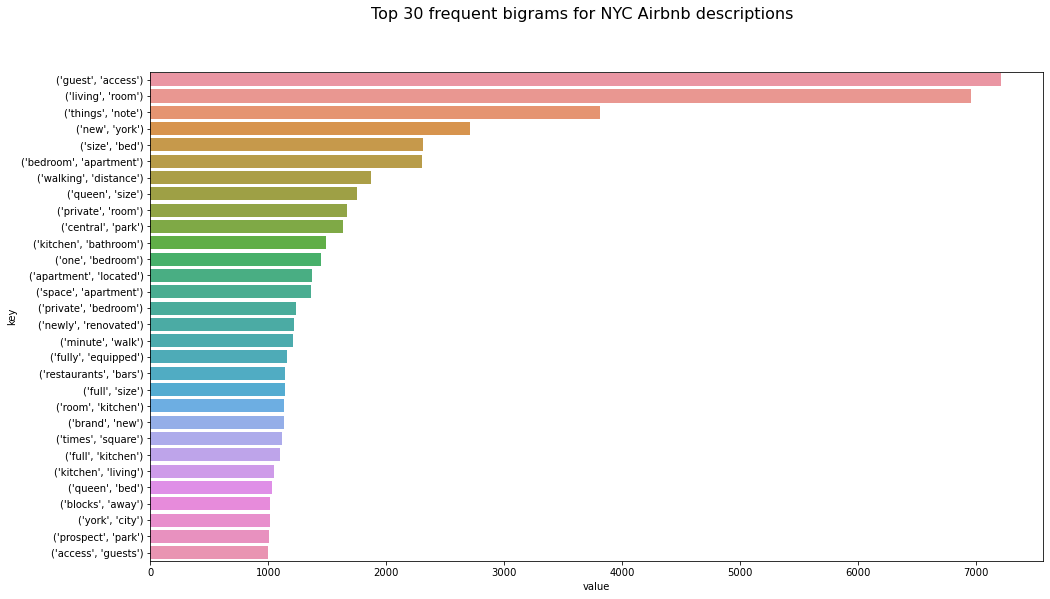

In [54]:
# Bigram analysis

data_bigram=(pd.Series(nltk.ngrams(str_val, 2)).value_counts())[:30]
data_bigram_df=pd.DataFrame(data_bigram)
data_bigram_df = data_bigram_df.reset_index()
data_bigram_df = data_bigram_df.rename(columns={"index": "key", 0: "value"})

plt.figure(figsize = (16,9))
sns.barplot(x='value',y='key', data=data_bigram_df)
plt.suptitle('Top 30 frequent bigrams for NYC Airbnb descriptions',size=16)

Text(0.5, 0.98, 'Top 30 frequent trigrams for NYC Airbnb descriptions')

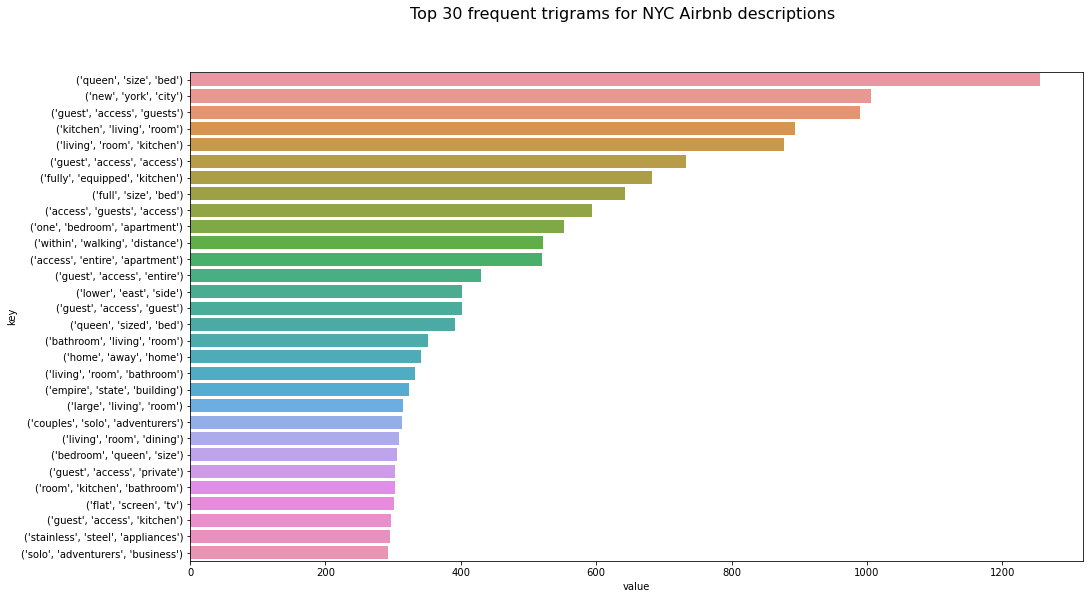

In [55]:
# Trigram analysis

data_trigram=(pd.Series(nltk.ngrams(str_val, 3)).value_counts())[:30]
data_trigram_df=pd.DataFrame(data_trigram)
data_trigram_df = data_trigram_df.reset_index()
data_trigram_df = data_trigram_df.rename(columns={"index": "key", 0: "value"})

plt.figure(figsize = (16,9))
sns.barplot(x='value',y='key', data=data_trigram_df)
plt.suptitle('Top 30 frequent trigrams for NYC Airbnb descriptions',size=16)

Text(0.5, 0.98, 'Top 30 frequent amenities')

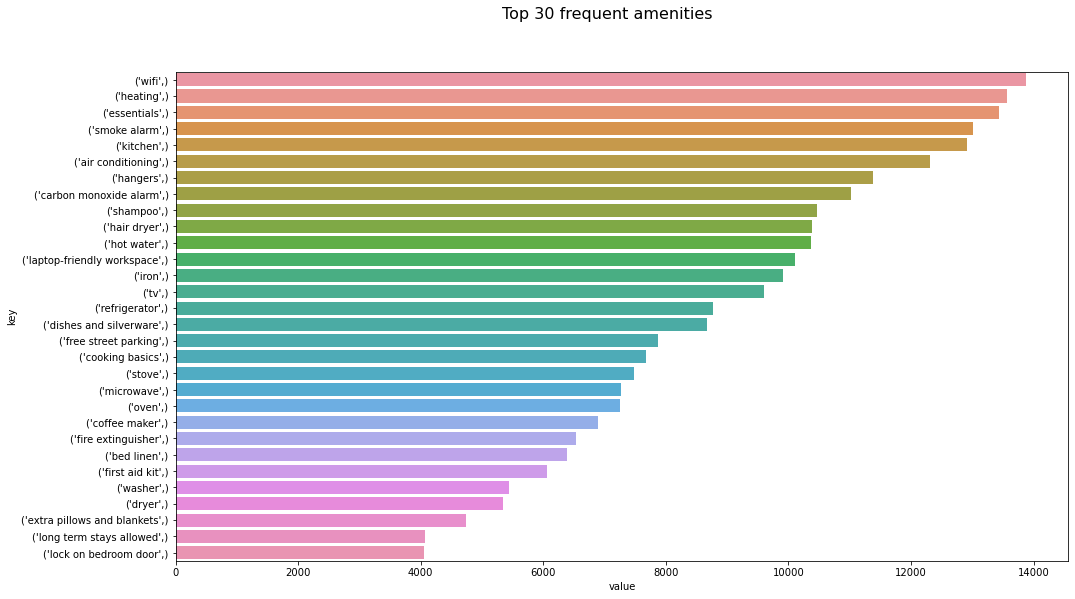

In [56]:
# Amenities
# Unigram analysis

data_unigram=(pd.Series(nltk.ngrams(amenities, 1)).value_counts())[:30]
data_unigram_df=pd.DataFrame(data_unigram)
data_unigram_df = data_unigram_df.reset_index()
data_unigram_df = data_unigram_df.rename(columns={"index": "key", 0: "value"})
plt.figure(figsize = (16,9))
sns.barplot(x='value',y='key', data=data_unigram_df)
plt.suptitle('Top 30 frequent amenities',size=16)

Text(0.5, 0.98, 'Last 20 frequent amenities')

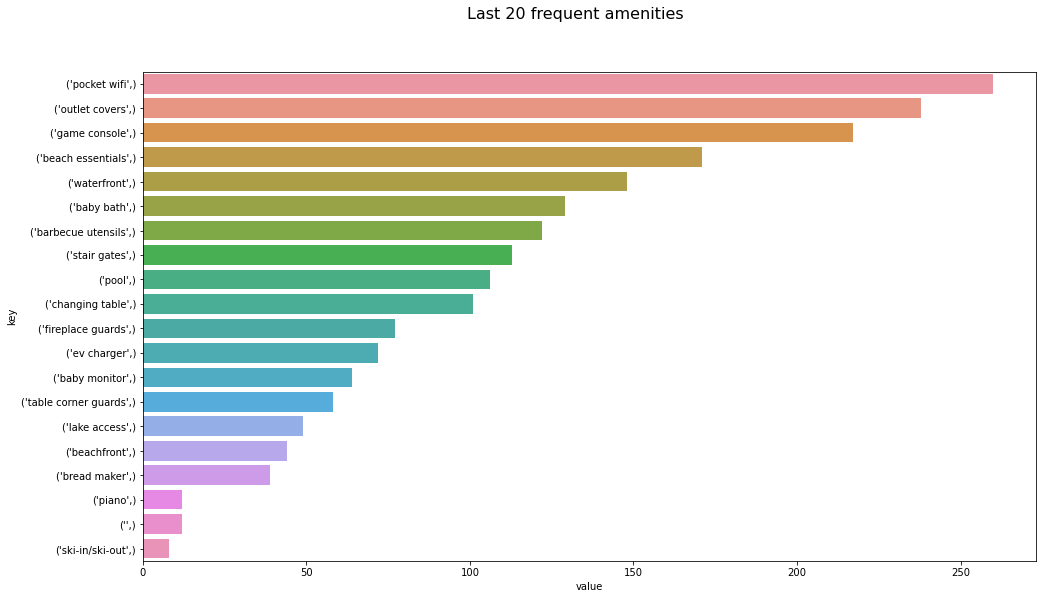

In [57]:
# Unigram analysis

data_unigram=(pd.Series(nltk.ngrams(amenities, 1)).value_counts())[65:]
data_unigram_df=pd.DataFrame(data_unigram)
data_unigram_df = data_unigram_df.reset_index()
data_unigram_df = data_unigram_df.rename(columns={"index": "key", 0: "value"})
plt.figure(figsize = (16,9))
sns.barplot(x='value',y='key', data=data_unigram_df)
plt.suptitle('Last 20 frequent amenities',size=16)

## Feature Extraction- Qinyi Li

In [58]:
def Pool(row):
    if 'pool'in row['amenities_list']:
        return 1
    else:
        return  0
    
def BabyBath(row):
    if 'baby bath'in row['amenities_list']:
        return 1
    else:
        return  0

def BabyMonitor(row):
    if 'baby monitor'in row['amenities_list']:
        return 1
    else:
        return  0
    
def LakeAccess(row):
    if 'lake access'in row['amenities_list']:
        return 1
    else:
        return  0
    
def BeachFront(row):
    if 'beach front'in row['amenities_list']:
        return 1
    else:
        return  0
    
def Piano(row):
    if 'piano'in row['amenities_list']:
        return 1
    else:
        return  0

In [59]:
data['Pool'] = data.apply(Pool, axis = 1)
data['BabyBath'] = data.apply(BabyBath, axis = 1)
data['BabyMonitor'] = data.apply(BabyMonitor, axis = 1)
data['LakeAccess'] = data.apply(LakeAccess, axis = 1)
data['BeachFront'] = data.apply(BeachFront, axis = 1)
data['Piano'] = data.apply(Piano, axis = 1)

In [60]:
data.head(3)

,id,name,description,neighborhood_overview,host_id,price,host_name,host_about,host_is_superhost,host_has_profile_pic,...,Price,clean_description,final_description,amenities_list,Pool,BabyBath,BabyMonitor,LakeAccess,BeachFront,Piano
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,4869,76,LisaRoxanne,Laid-back Native New Yorker (formerly bi-coast...,0,1,...,4,"enjoy 500 s.f. top floor in 1899 brownstone, w...",enjoy top floor brownstone wood ceramic floori...,"[iron, extra pillows and blankets, smoke alarm...",0,0,0,0,0,0
4,5178,Large Furnished Room Near B'way_,Please don__ expect the luxury here just a bas...,"Theater district, many restaurants around here.",8967,79,Shunichi,I used to work for a financial industry but no...,0,1,...,4,please don__ expect the luxury here just a bas...,please expect luxury basic room center manhatt...,"[refrigerator, iron, extra pillows and blanket...",0,0,0,0,0,0
5,5203,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,7490,75,MaryEllen,Welcome to family life with my oldest two away...,0,1,...,4,"our best guests are seeking a safe, clean, spa...",best guests seeking safe clean spare room fami...,"[laptop-friendly workspace, carbon monoxide al...",0,0,0,0,0,0


In [61]:
df_clean = data.drop(['id', 'name','description','neighborhood_overview','host_id','host_name','host_about' ,'amenities','price','log_price','clean_description','final_description','amenities_list'],axis=1)

## Machine Learning - Di An

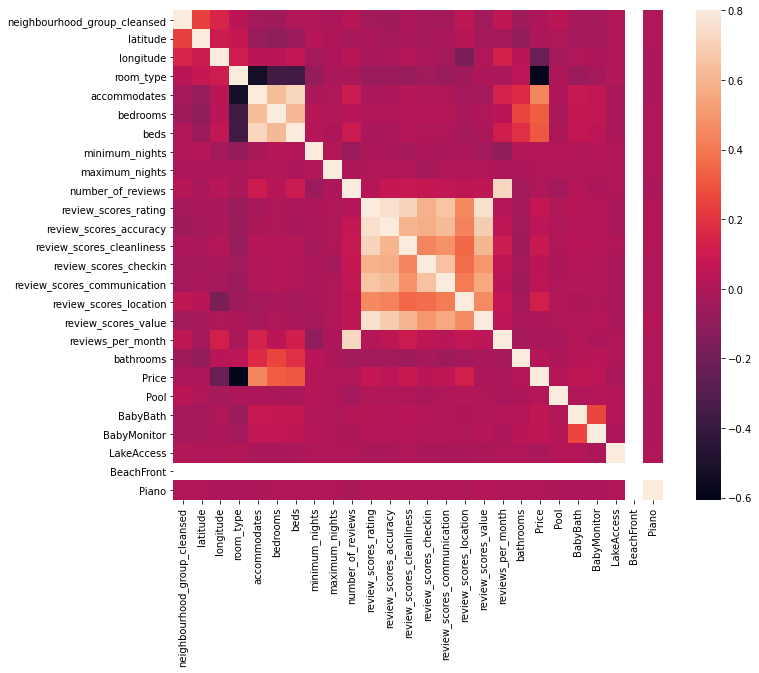

In [62]:
# Correlation Matrix Heatmap
corrmat = df_clean.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

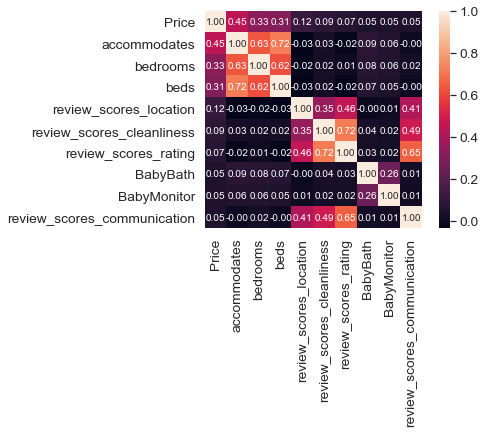

In [63]:
# Top 10 Heatmap
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Price')['Price'].index
cm = np.corrcoef(df_clean[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [64]:
training_dataset, test_dataset = train_test_split(df_clean, test_size=0.25, random_state=1)

In [65]:
# Spot Check Algorithms
models = []

# Gaussian Naive Bayes
models.append(('NB', GaussianNB())) 

# Support Vector Machine
models.append(('SVM', SVC(gamma='auto')))

# K-Nearest Neighbors 
models.append(('KNN', KNeighborsClassifier()))

# Decision Tree
models.append(('CART', DecisionTreeClassifier()))

# Random Forest
models.append(('RF', RandomForestClassifier()))

# Logistic Regression
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))

# Linear Discriminant
models.append(('LDA', LinearDiscriminantAnalysis()))

# Gradient Boosting
models.append(('GB', GradientBoostingClassifier()))

In [66]:
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, 
                                 training_dataset[['neighbourhood_group_cleansed','room_type','accommodates','bedrooms','beds','bathroom_share_or_not','bathrooms',
                                                   'host_is_superhost','host_has_profile_pic','host_identity_verified','minimum_nights','maximum_nights','number_of_reviews',
                                                   'review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication',
                                                   'review_scores_location','review_scores_value','instant_bookable','reviews_per_month','Pool','BabyBath','BabyMonitor','LakeAccess','BeachFront','Piano']], 
                                 training_dataset['Price'], cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(),cv_results.std()))

NB: 0.449280 (0.011377)
SVM: 0.674822 (0.014950)
KNN: 0.623627 (0.014546)
CART: 0.640122 (0.012668)
RF: 0.754170 (0.013547)
LR: 0.739382 (0.012711)
LDA: 0.728005 (0.013940)
GB: 0.755499 (0.013150)


Text(0.5, 1.0, 'Algorithm Comparison')

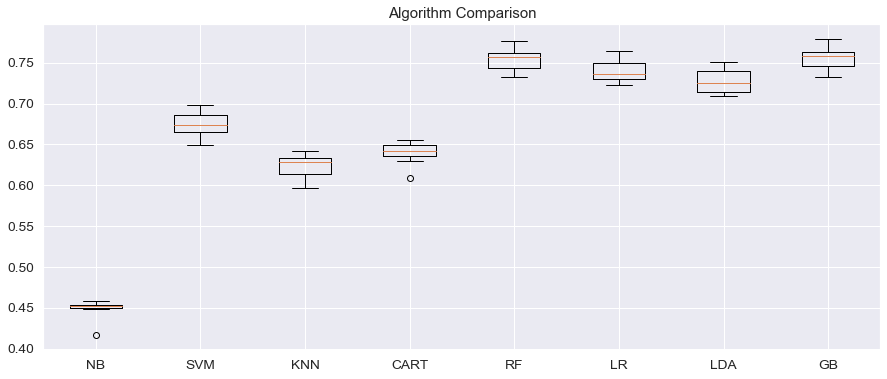

In [67]:
# Compare Algorithms
fig,ax = plt.subplots(figsize=(15,6))
ax.boxplot(results, labels=names)
plt.title('Algorithm Comparison')


In [68]:
# Make predictions on testing dataset
model = GradientBoostingClassifier()
model.fit(training_dataset[['neighbourhood_group_cleansed','room_type','accommodates','bedrooms','beds','bathroom_share_or_not','bathrooms',
                                                   'host_is_superhost','host_has_profile_pic','host_identity_verified','minimum_nights','maximum_nights','number_of_reviews',
                                                   'review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication',
                                                   'review_scores_location','review_scores_value','instant_bookable','reviews_per_month','Pool','BabyBath','BabyMonitor','LakeAccess','BeachFront','Piano']],
                           training_dataset['Price'])
predictions = model.predict(test_dataset[['neighbourhood_group_cleansed','room_type','accommodates','bedrooms','beds','bathroom_share_or_not','bathrooms',
                                                   'host_is_superhost','host_has_profile_pic','host_identity_verified','minimum_nights','maximum_nights','number_of_reviews',
                                                   'review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication',
                                                   'review_scores_location','review_scores_value','instant_bookable','reviews_per_month','Pool','BabyBath','BabyMonitor','LakeAccess','BeachFront','Piano']])

In [69]:
# Evaluate predictions
print(accuracy_score(test_dataset['Price'], predictions))
print(confusion_matrix(test_dataset['Price'], predictions).T)
print(classification_report(test_dataset['Price'], predictions))

0.7716154721274175
[[   0    0    0    0    0]
 [   1   14   15    1    0]
 [   0   80 1320  292    3]
 [   0    2  273 1370  133]
 [   0    0    2    1    9]]
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.45      0.15      0.22        96
           4       0.78      0.82      0.80      1610
           5       0.77      0.82      0.80      1664
           6       0.75      0.06      0.11       145

    accuracy                           0.77      3516
   macro avg       0.55      0.37      0.39      3516
weighted avg       0.76      0.77      0.75      3516



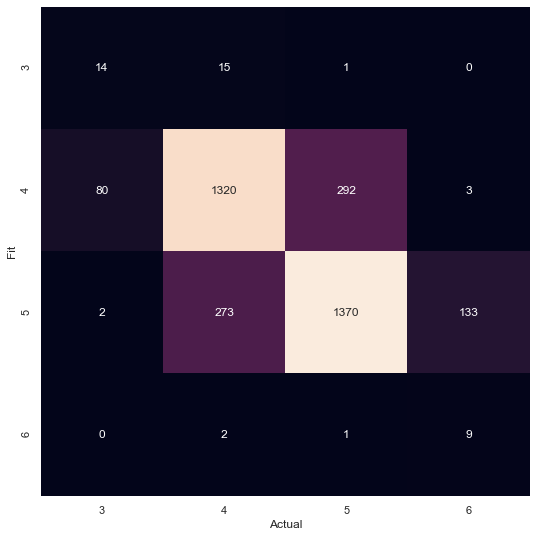

In [70]:
# Evaluate predictions
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix

# Import metrics model to check the accuracy
from sklearn import metrics

Price_Category=[3,4,5,6]
mat = confusion_matrix(test_dataset['Price'], 
                       predictions,
                       labels=Price_Category)
plt.figure(figsize=(12, 9))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=Price_Category, yticklabels=Price_Category)
plt.xlabel('Actual')
plt.ylabel('Fit')
plt.show()

#4~5:$55~$404

In [ ]:
import tkinter as tk

fields = ('Neighbourhood','RoomType','Accommodates','Bedrooms','Beds','BathroomShare','Bathrooms',
         'Superhost','ProfilePic','IdentityVerified','MinimumNights','MaximumNights','NumberOfReviews','Rating','Accuracy',
         'Cleanliness','Checkin','Communication','Location','Value','InstantBookable','ReviewsPerMonth','Pool','BabyBath',
          'BabyMonitor','LakeAccess','BeachFront','Piano','LowerPriceRange','UpperPriceRange')



def recommended_price(entries):
    Neighbourhood = int(entries['Neighbourhood'].get())
    RoomType = int(entries['RoomType'].get())
    Accommodates = int(entries['Accommodates'].get())
    Bedrooms = int(entries['Bedrooms'].get())
    Beds = int(entries['Beds'].get())
    BathroomShare = int(entries['BathroomShare'].get())
    Bathrooms = int(entries['Bathrooms'].get())
    Superhost = int(entries['Superhost'].get())
    ProfilePic = int(entries['ProfilePic'].get())
    IdentityVerified = int(entries['IdentityVerified'].get())
    MinimumNights = int(entries['MinimumNights'].get())
    MaximumNights = int(entries['MaximumNights'].get())
    NumberOfReviews = int(entries['NumberOfReviews'].get())
    Rating = int(entries['Rating'].get())
    Accuracy = int(entries['Accuracy'].get())
    Cleanliness = int(entries['Cleanliness'].get())
    Checkin = int(entries['Checkin'].get())
    Communication = int(entries['Communication'].get())
    Location = int(entries['Location'].get())
    Value = int(entries['Value'].get())
    InstantBookable = int(entries['InstantBookable'].get())
    ReviewsPerMonth = int(entries['ReviewsPerMonth'].get())
    Pool = int(entries['Pool'].get())
    BabyBath = int(entries['BabyBath'].get())
    BabyMonitor = int(entries['BabyMonitor'].get())
    LakeAccess = int(entries['LakeAccess'].get())
    BeachFront = int(entries['BeachFront'].get())
    Piano = int(entries['Piano'].get())
    d = {'neighbourhood_group_cleansed': [Neighbourhood],'room_type': [RoomType],'accommodates': [Accommodates], 
         'bedrooms': [Bedrooms],'beds': [Beds], 'bathroom_share_or_not': [BathroomShare],'bathrooms': [Bathrooms],
         'superhost': [Superhost],'profile_pic': [ProfilePic],'identity_verified': [IdentityVerified], 
         'minimum_nights': [MinimumNights],'maximum_nights': [MaximumNights], 'number_of_reviews': [NumberOfReviews],
         'review_scores_rating': [Rating], 'review_scores_accuracy': [Accuracy],'review_scores_cleanliness': [Cleanliness], 
         'review_scores_checkin': [Checkin],'review_scores_communication': [Communication], 'review_scores_location': [Location],
         'review_scores_value': [Value], 'instant_bookable': [InstantBookable],'reviews_per_month': [ReviewsPerMonth], 
         'Pool': [Pool],'BabyBath': [BabyBath],'BabyMonitor': [BabyMonitor],'LakeAccess': [LakeAccess],'BeachFront': [BeachFront],
         'Piano': [Piano]}
    inputdf = pd.DataFrame(data=d)
    predictions = model.predict(inputdf)
    price_lower_range=np.exp(int(predictions))
    price_upper_range=np.exp(int(predictions)+1)
    entries['LowerPriceRange'].delete(0, tk.END)
    entries['LowerPriceRange'].insert(0, price_lower_range)
    entries['UpperPriceRange'].delete(0, tk.END)
    entries['UpperPriceRange'].insert(0, price_upper_range)
    
        
    
def makeform(root, fields):
    entries = {}
    for field in fields:
        print(field)
        row = tk.Frame(root)
        lab = tk.Label(row, width=20, text=field+": ", anchor='w')
        ent = tk.Entry(row)
        ent.insert(0,'') #Blank cell
        row.pack(side=tk.TOP, 
                 fill="both", 
                 expand=True, 
                 padx=0.3, 
                 pady=0.3)
        lab.pack(side=tk.LEFT,fill="both", expand=True)
        ent.pack(side=tk.RIGHT,fill="both", expand=True)
        entries[field] = ent
    return entries


if __name__ == '__main__':
    root = tk.Tk()
    root.title("Airbnb") #window title
    ents = makeform(root, fields)
    b1 = tk.Button(root, text='Calculation',
           command=(lambda e=ents: recommended_price(e)))
    b1.pack(side=tk.RIGHT, padx=1, pady=1)
    root.mainloop()
    

Neighbourhood
RoomType
Accommodates
Bedrooms
Beds
BathroomShare
Bathrooms
Superhost
ProfilePic
IdentityVerified
MinimumNights
MaximumNights
NumberOfReviews
Rating
Accuracy
Cleanliness
Checkin
Communication
Location
Value
InstantBookable
ReviewsPerMonth
Pool
BabyBath
BabyMonitor
LakeAccess
BeachFront
Piano
LowerPriceRange
UpperPriceRange


In [ ]:
d1 = {'neighbourhood_group_cleansed': [1],'room_type': [2],'accommodates': [2], 'bedrooms': [1],'beds': [1], 'bathroom_share_or_not': [1],'bathrooms': [1],'superhost': [1], 
     'profile_pic': [1],'identity_verified': [1], 'minimum_nights': [7],'maximum_nights': [60], 'number_of_reviews': [49],
     'review_scores_rating': [97], 'review_scores_accuracy': [10],'review_scores_cleanliness': [10], 'review_scores_checkin': [10],
     'review_scores_communication': [10], 'review_scores_location': [10],'review_scores_value': [9], 'instant_bookable': [0],
     'reviews_per_month': [0], 'Pool': [0],'BabyBath': [0],'BabyMonitor': [0],'LakeAccess': [0],'BeachFront': [0],'Piano': [0]}
inputdf1 = pd.DataFrame(data=d1)
predictions1 = model.predict(inputdf1)
price_lower_range1=np.exp(int(predictions1))
price_upper_range1=np.exp(int(predictions1)+1)
print("Recommended price:",price_lower_range1,"~",price_upper_range1)